In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_decision_regions
from scipy.optimize import minimize

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
class softmax:
    def __init__(self,batch_size, alpha=0.001, method='mbatch-gradient',num_epochs=100):
        self.details = None
        self.repeat = None
        self.w=None
        self.b=None
        self.batch_size=batch_size
        self.alpha=alpha
        self.method=method
        self.num_epochs=num_epochs

    def fit(self,x, y):
        y = y.reshape((-1, 1))
        mfyY = np.zeros((y.shape[0], int(np.max(y, axis=0) + 1)))
        for i in range(0, y.shape[0]):
            mfyY[i, y[i, 0]] = 1
        w = np.random.rand(x.shape[1], mfyY.shape[1])
        b = np.random.rand(1, mfyY.shape[1])
        if self.method == 'st-gradient':
            result = self.st_gradient_descent(x, mfyY, w, b)
        elif self.method == "mbatch-gradient":
            result = self.mbatch_gradient_descent(x, mfyY, w, b)
        self.w=result.get('w')
        self.b=result.get('b')
        self.details=result.get('details')
        self.repeat=result.get('repeat')
        ##########
        print(self.details)
        ##########
        return self

    def mbatch_gradient_descent(self,x, y, w, b):
        jdetails = np.array([])
        jrepeat = np.array([])
        last = self.cost_function(x, y, w, b)
        nrepeat = 1
        for j in range(0,self.num_epochs):
#             print(nrepeat)
            index = np.random.choice(x.shape[0], self.batch_size, replace=False)
            x_batch = x[index]
            y_batch = y[index]
            m=(1/x_batch.shape[0])
            nw,nb=self.update_parameters(x_batch, y_batch, w, b)
            b = b - self.alpha * nb
            w = w - self.alpha * nw
            jdetails = np.hstack((jdetails, np.array([self.cost_function(x, y, w, b)])))
            jrepeat = np.hstack((jrepeat, np.array([nrepeat])))
            nrepeat += 1
            if self.cost_function(x, y, w, b) >= last:
                self.alpha = self.alpha / 3
            last = self.cost_function(x, y, w, b)
        return {'w': w, 'b': b, 'details': jdetails, 'repeat': jrepeat}

    def cost_function(self,x, y, w, b):
        h = self.hypothsis_function(x, w, b)
        expH = np.exp(h)
        sumExpH = np.sum(expH, axis=1).reshape(-1, 1)
        resultSumExpH = np.copy(sumExpH)
        for i in range(0, expH.shape[1] - 1):
            resultSumExpH = np.append(resultSumExpH, sumExpH, axis=1)
        probablity = np.log(expH / sumExpH)
        return -np.sum(y * probablity)

    def update_parameters(self,x, y, w, b):
        h = self.hypothsis_function(x, w, b)
        h=h-np.max(h,axis=1,keepdims=True)
        expH = np.exp(h)
        sumExpH = np.sum(expH, axis=1,keepdims=True)
        prob=expH/sumExpH
        prob[y == 1] = prob[y== 1] - 1  
        nw = x.T @ prob
        prob=prob.sum(axis=0)
        return nw, prob

    def hypothsis_function(self,x, w, b):
        return x @ w + b

    def predict(self,x):
        result = x @ self.w + self.b
        return np.argmax(result, axis=1)

In [4]:
x,y=make_moons(n_samples=300,noise=0.15,random_state=12)

In [5]:
poly_features1 = PolynomialFeatures(degree=3, include_bias=False)
log_reg1 = softmax(300,alpha=0.001,num_epochs=1000)
model1 = Pipeline([("poly_features", poly_features1), ("logistic_regression", log_reg1)])

In [6]:
clf1=model1.fit(x,y)

[150.23544181 142.74564929 136.65656675 131.58601499 127.27458791
 123.5424447  120.26215829 117.34151851 114.71246413 112.32382238
 110.13645163 108.1199292  106.25025158 104.50821066 102.87822923
 101.3475141   99.90543203  98.54304454  97.25275733  96.02805349
  94.86328855  93.75353186  92.69444253  91.68217188  90.71328597
  89.78470351  88.89364587  88.03759621  87.21426604  86.42156737
  85.6575894   84.92057894  84.20892358  83.5211373   82.85584803
  82.21178676  81.58777797  80.98273122  80.39563366  79.82554336
  79.27158331  78.73293607  78.20883891  77.69857944  77.20149166
  76.71695231  76.24437763  75.78322038  75.33296704  74.89313542
  74.46327229  74.04295132  73.63177118  73.22935372  72.83534242
  72.44940084  72.07121129  71.7004735   71.33690355  70.9802327
  70.63020643  70.28658353  69.94913522  69.61764439  69.29190484
  68.97172062  68.65690539  68.34728183  68.04268113  67.74294243
  67.4479124   67.15744476  66.8713999   66.5896445   66.31205115
  66.038498

In [7]:
n=np.arange(-1.5,2.5,step=0.01)
m=np.arange(-1,1.5,step=0.01)

In [8]:
nn,mm=np.meshgrid(n,m)

In [9]:
nn.shape

(250, 400)

In [10]:
mm.shape

(250, 400)

In [11]:
nv=nn.reshape(-1,1)

In [12]:
mv=mm.reshape(-1,1)

In [13]:
xtest=np.hstack((nv,mv))

In [14]:
z=model1.predict(xtest)
z=1/(1+np.exp(-z))
z[z<=0.5]=0
z[z>0.5]=1
z

array([0., 0., 0., ..., 1., 1., 1.])

<ipython-input-15-6a240bad4d12>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(nn,mm,z,cmap=plt.cm.Accent)


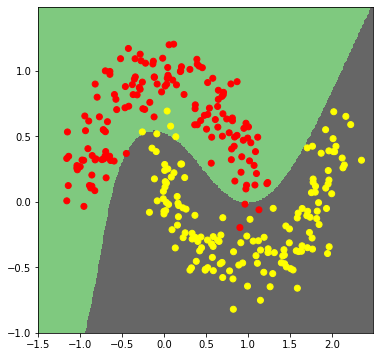

In [15]:
z=z.reshape(nn.shape)
plt.figure(1,figsize=(6,6))
plt.pcolormesh(nn,mm,z,cmap=plt.cm.Accent)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.autumn)